**The given Telco-Customer-Churn data is being grouped in three aspect;**

* Churn

# Numeric Feature:

* Tenure
* MonthlyCharges
* TotalCharges

# Categorical Features:

* Gender
* SeniorCitizen
* Dependents
* PhoneService
* MultipleLines
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* Contract
* PaperlessBilling
* PaymentMethod

.

# QUESTIONS ON TARGET

* What is the total percentage/ number of those who churn?

# QUESTIONS ON Numeric Feature

* Is there a relationship between Churn and Tenure?
* Is there a relationship between Churn and monthly charges/ does increase in monthly charges leads to churn?

# QUESTIONS ON Categorical Features

* What is the overall gender composition(number of males and females)
* What is the Gender Distribution by Churn(whether males churn more than females)
* Senior Citizen and non Senior Citizen, who churn most?
* What is the percentage of those with partner and those without partner?
* Those with partner and those without partner,who churn most?
* Those who  has dependents and those who don't have ,who churn most?
* Those with single line churn most?...monthly charges
* What is the number of people churn by InternetService?
* What is the number of people churn by Contract type?
* What is the number of people churn by PaperlessBilling?
* What is the number of people churn by PaymentMethod?

In [2]:
!pip install -q unidecode
!pip install -q sklearn
!pip install -q imblearn
!pip install -q GraphViz
!pip install -q CatBoost
!pip install -q SweetViz
!pip install -q pandas-profiling
!pip install -q gradio
!pip install -q matplotlib
!pip install -q plotly

     |████████████████████████████████| 235 kB 5.9 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 15.1 MB 8.1 MB/s 
     |████████████████████████████████| 13.8 MB 8.3 MB/s 
     |████████████████████████████████| 2.3 MB 57.9 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 278 kB 62.1 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 106 kB 69.7 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 69 kB 7.2 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 


In [3]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#import squarify
import csv
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
from unidecode import unidecode
pd.set_option('display.max_columns',None)
import sweetviz as sv
import gradio as gr


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn import compose
from sklearn import preprocessing 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
import urllib, os, pickle
from sklearn import metrics
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import NearMiss


In [4]:
from google.colab import files
uploaded= files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#dropping ID column
data.drop(data.columns[[0]], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
#converting 'TotalCharges' column to float type...
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**it seems we were having 11 empty spaces in the TotalCharges column...let's check why**

In [10]:
#checking if a person couldn't stay with the company 
data[data['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Since we are interested in the Number of months the customer has stayed with the company , we will drop data of all who couldn't stay with the company and having empty Totalcharges** 

In [11]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [12]:
#checking for missing values
null_values=pd.isnull(data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
gender,0,0.0
SeniorCitizen,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0


In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**It looks like we don't have much trouble with missing data now... So we will go straight to answering our quesgtions**


In [14]:
#Print number of unique values per feature location
print(f"Unique Values: {data.nunique()} \n")

Unique Values: gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64 



# TARGET

**What is the total percentage/ number of those who churn?**

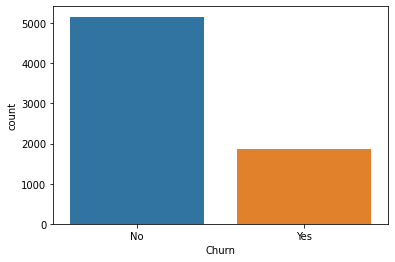

In [15]:
#churn count
sns.countplot(data=data, x='Churn')

#Churn percentage
fig1 = go.Figure(
    data=go.Pie(values=data['Churn'].value_counts().values,labels=data['Churn'].value_counts().index,title='percentage of those who churn'))
#fig1.show()
plt.show()
rcParams['figure.figsize'] = 15,8

**We are having those who churn to have a percentage of 26.5(1889) and 
those don't churn to be 73.5(5163)**

# Numeric Feature

**1.1 Is there a relationship between Churn and Tenure?**

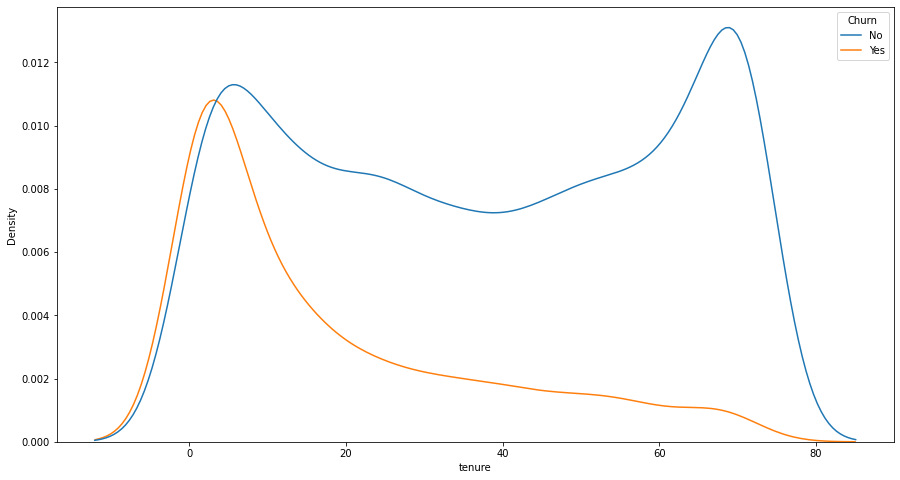

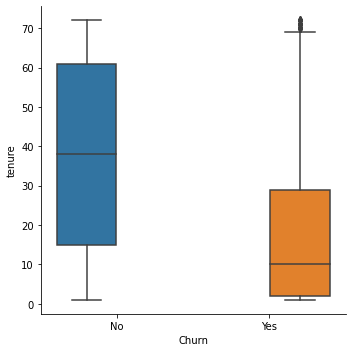

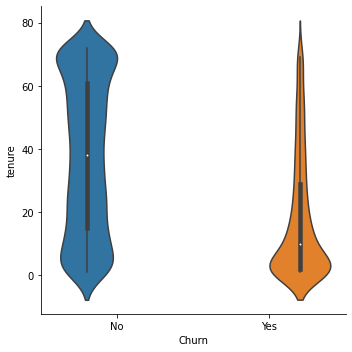

In [16]:
#tenure relation with churn
rcParams['figure.figsize'] = 15,8
sns.kdeplot(data= data, x='tenure', hue='Churn')
sns.catplot(data= data, x='Churn',y='tenure',kind='box', hue='Churn')
sns.catplot(data= data, x='Churn',y='tenure',kind='violin', hue='Churn')

In [17]:
#copying data so that grouping of the tenure won't affect our main dataframe
df = data.copy()
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
#creating a function to group tenure in months
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

In [19]:
def tenure_group_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

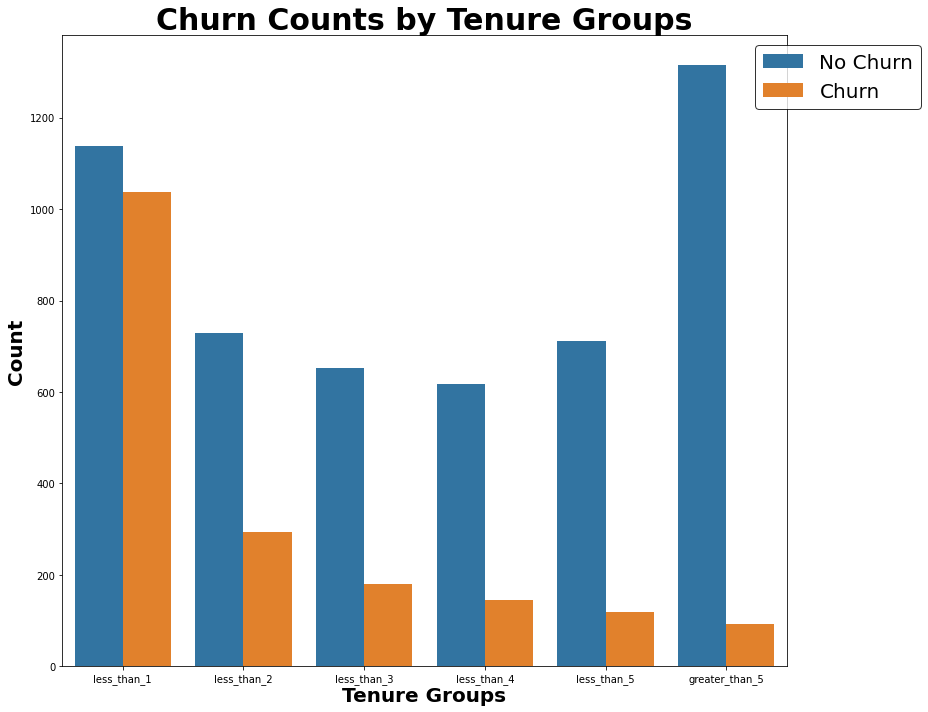

In [20]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)
tenure_group_counts(df)

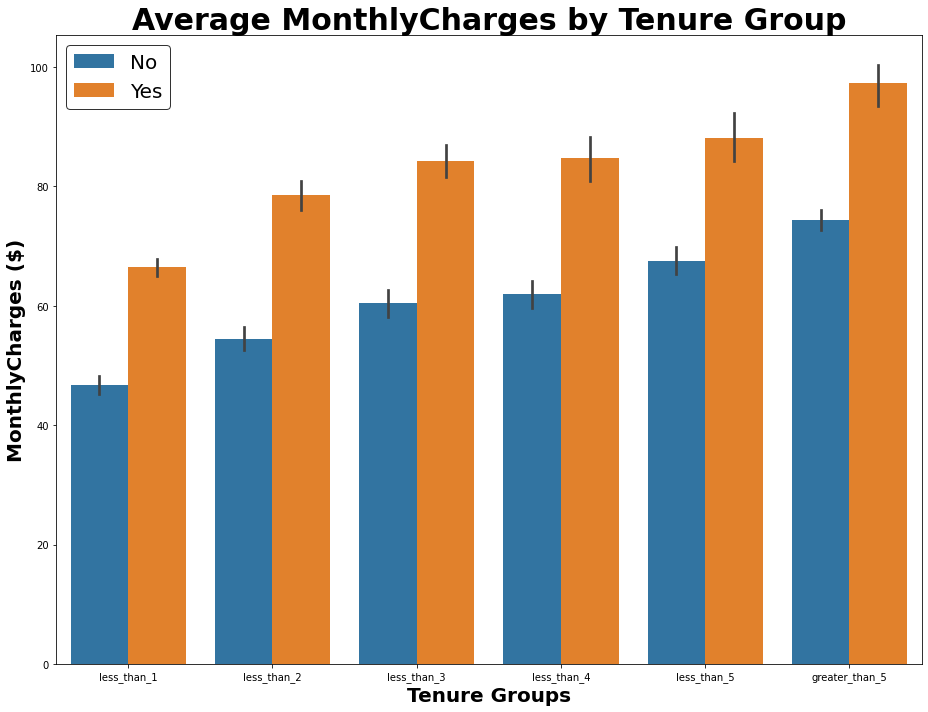

In [21]:
def plot_numerical_averages(df, feature):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'grouped_tenure', y = feature, hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    b.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    b.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average {feature} by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()
plot_numerical_averages(df, 'MonthlyCharges')

* Customers with shorter service tenures (newer clients) are more likely to churn than those with longer tenures....so most of the people who left service had less tenure

* Monthly Charges: In general, the likelihood of a customer churning increases as charges rise, with customers having the highest likelihood of churning when their monthly charges approach $60.



**1.2 Is there a relationship between Churn and monthly charges/ does increase in monthly charges leads to churn?**

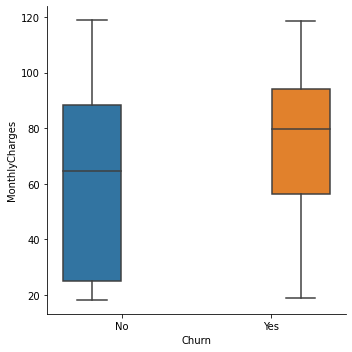

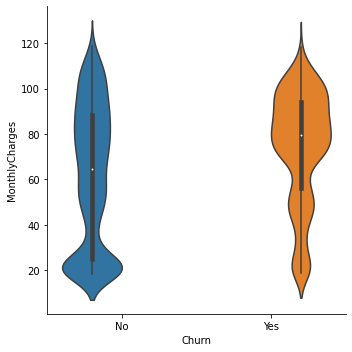

In [22]:
#MonthlyCharges relation with churn
sns.catplot(data= data, x='Churn',y='MonthlyCharges',kind='box', hue='Churn')
sns.catplot(data= data, x='Churn',y='MonthlyCharges',kind='violin', hue='Churn')

* From the above graph, we can see that the people who left had higher monthly charges.

# Questions on Categorical Features

**1.1 What is the overall gender composition(number of males and females)**

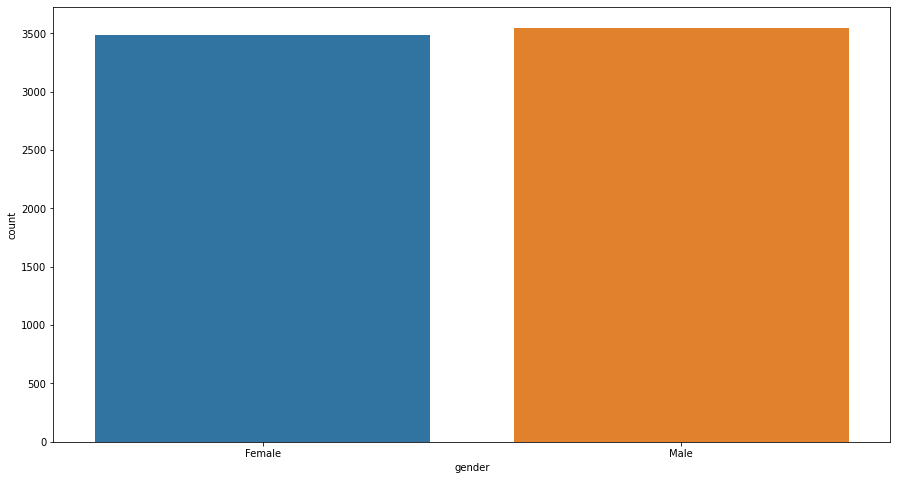

In [23]:
sns.countplot(data=data,x='gender')
fig1 = go.Figure(
    data=go.Pie(values=data['gender'].value_counts().values,labels=data['gender'].value_counts().index,title='percentage of males and female'))
fig1.show()
plt.show
rcParams['figure.figsize'] = 15,8

According to the pie chart,we have 3488(49.5%) females and 3555(50.5%) males


**1.2 What is the Gender Distribution by Churn(whether males churn more than females)**

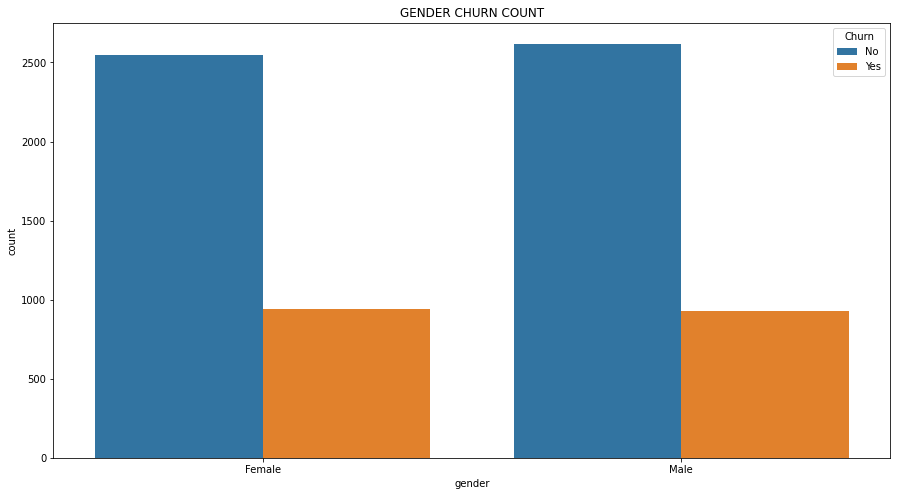

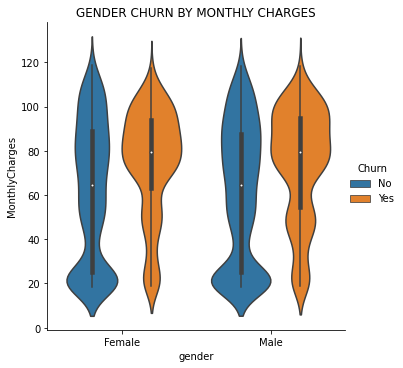

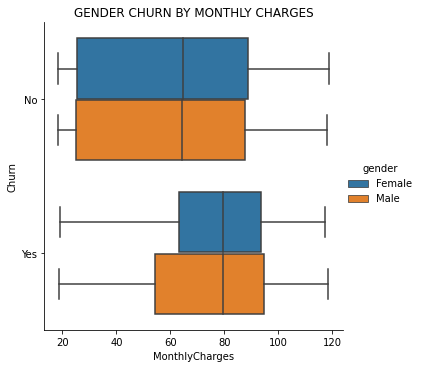

In [24]:
#GENDER CHURN
rcParams['figure.figsize'] = 15,8
sns.countplot(data=data,x='gender',hue='Churn').set(title='GENDER CHURN COUNT')

#Gender churn by monthly charges
sns.catplot(data=data,x='gender',y='MonthlyCharges', kind='violin',hue='Churn').set(title='GENDER CHURN BY MONTHLY CHARGES')
plt.show()

#Gender churn by monthly charges
sns.catplot(data=data,x='MonthlyCharges',y='Churn', kind='box',hue='gender').set(title='GENDER CHURN BY MONTHLY CHARGES')
plt.show()

* In our sample so far, gender is equally represented and doesn't seem to be a churn indication.

**1.3 Senior Citizen and non Senior Citizen, who churn most?**

In [25]:
def Age(x):
    b=str(x)
    if '0' in b:
        return 'Non-Senior'

    else:
        return 'SeniorCitizen'

In [26]:
data['SeniorCitizen'] = data['SeniorCitizen'].apply(Age)
data['SeniorCitizen']

0          Non-Senior
1          Non-Senior
2          Non-Senior
3          Non-Senior
4          Non-Senior
            ...      
7038       Non-Senior
7039       Non-Senior
7040       Non-Senior
7041    SeniorCitizen
7042       Non-Senior
Name: SeniorCitizen, Length: 7032, dtype: object

In [27]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Non-Senior,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Non-Senior,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,Non-Senior,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Non-Senior,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Non-Senior,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Non-Senior,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,Non-Senior,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,Non-Senior,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,SeniorCitizen,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


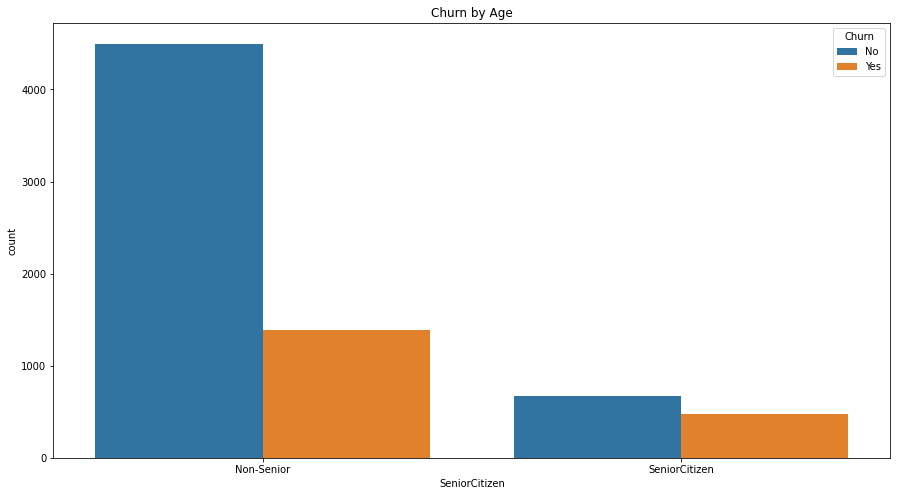

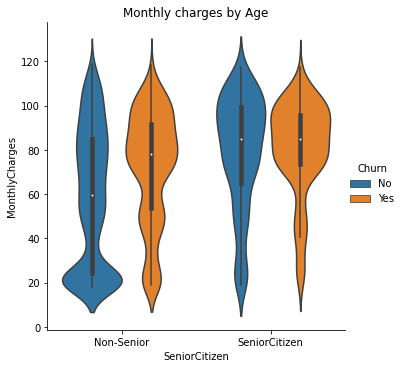

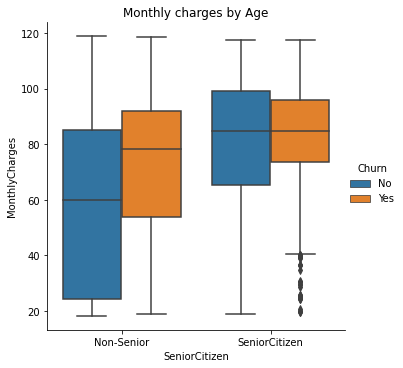

In [28]:
#percentage of Seniors And Non-Seniors
fig1 = go.Figure(
    data=go.Pie(values=data['SeniorCitizen'].value_counts().values,labels=data['SeniorCitizen'].value_counts().index,title='percentage of Seniors And Non-Seniors'))
fig1.show()

#citizen count
sns.countplot(data=data,x='SeniorCitizen',hue='Churn').set(title='Churn by Age')

#monthly charges by age
sns.catplot(data=data,x='SeniorCitizen',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by Age')
rcParams['figure.figsize'] = 15,8

#monthly charges by age
sns.catplot(data=data,x='SeniorCitizen',y= 'MonthlyCharges', kind='box',hue='Churn').set(title='Monthly charges by Age')
rcParams['figure.figsize'] = 15,8

* Only 16% of the people in our dataset are seniors, which is much smaller than the non-senior population.

* Overall, non-senior citizens leave more frequently than seniors do.

**1.4 What is the percentage or number of those with partner and those without partner?**

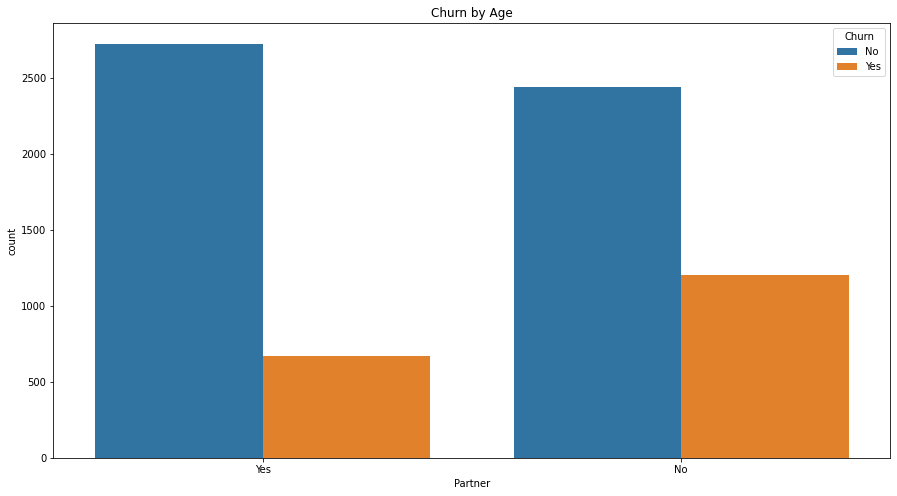

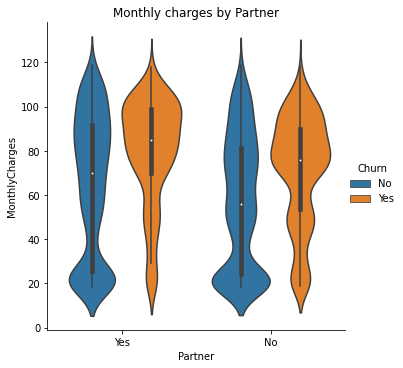

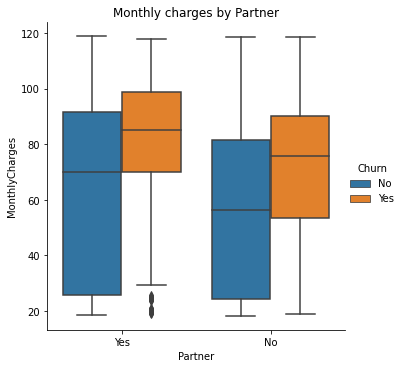

In [29]:
#percentage of those with partners and those without partner

fig1 = go.Figure(
    data=go.Pie(values=data['Partner'].value_counts().values,labels=data['Partner'].value_counts().index,title='percentage of those with partners and those without partner'))
fig1.show()

#citizen count
sns.countplot(data=data,x='Partner',hue='Churn').set(title='Churn by Age')

#monthly charges by age
sns.catplot(data=data,x='Partner',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by Partner')
rcParams['figure.figsize'] = 15,8


#monthly charges by age
sns.catplot(data=data,x='Partner',y= 'MonthlyCharges', kind='box',hue='Churn').set(title='Monthly charges by Partner')
rcParams['figure.figsize'] = 15,8

In general, people without partners churn more frequently than those who do.

**1.5 Those who  has dependents and those who don't have ,who churn most?**

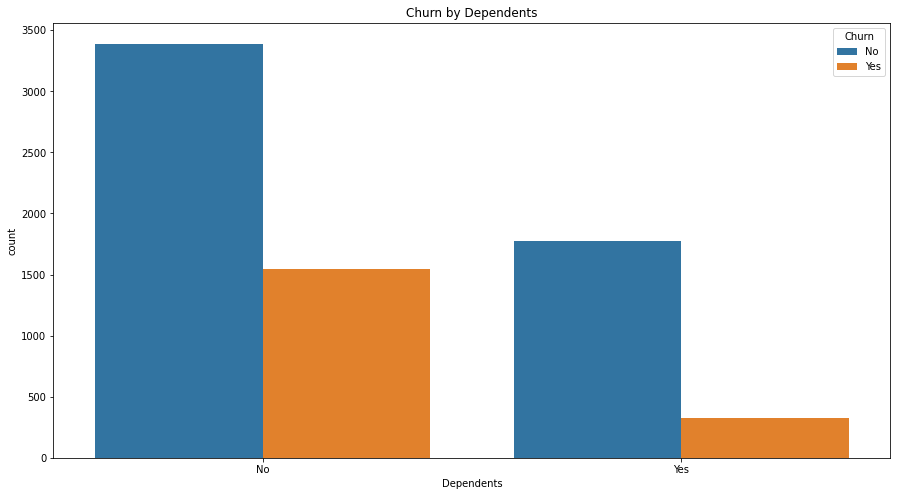

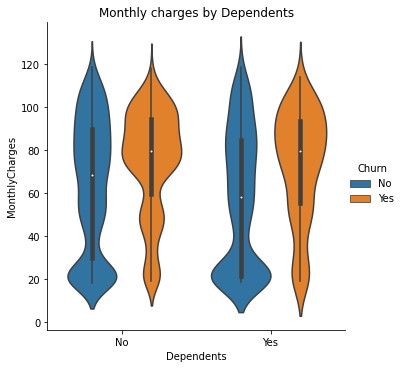

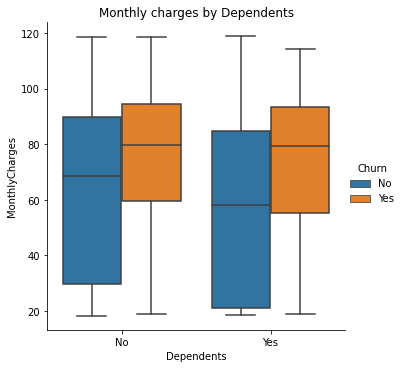

In [30]:
#percentage of those who has dependents and those who don't have
fig1 = go.Figure(
    data=go.Pie(values=data['Dependents'].value_counts().values,labels=data['Dependents'].value_counts().index,title='Dependents composition of overall data'))
fig1.show()


#Partner count by churn

sns.countplot(data=data,x='Dependents',hue='Churn').set(title='Churn by Dependents')
rcParams['figure.figsize'] = 15,8


#monthly charges by Partner
sns.catplot(data=data,x='Dependents',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by Dependents')
rcParams['figure.figsize'] = 15,8
plt.show()

#monthly charges by Partner
sns.catplot(data=data,x='Dependents',y= 'MonthlyCharges', kind='box',hue='Churn').set(title='Monthly charges by Dependents')
rcParams['figure.figsize'] = 15,8
plt.show()

* Those without dependents are more than those with dependents
* Customers who don't have Dependents are more likely to leave than those who do

**1.6 What is the of number  people churn by InternetService?**

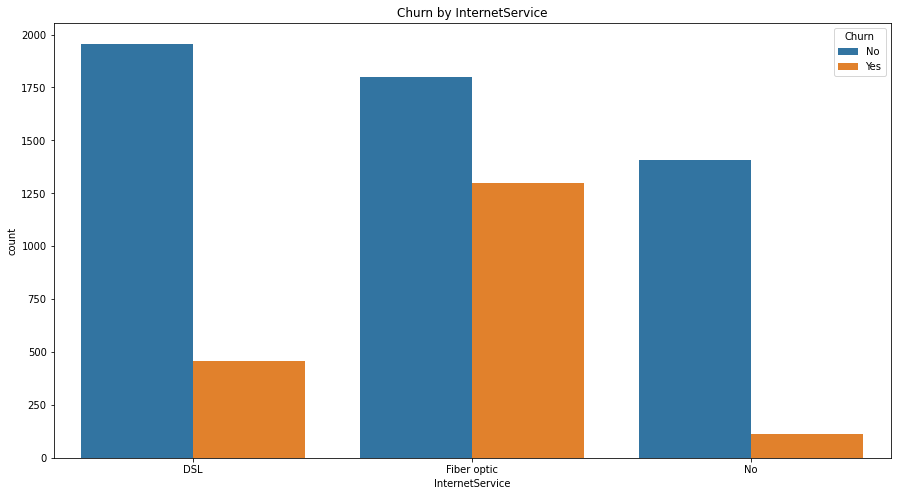

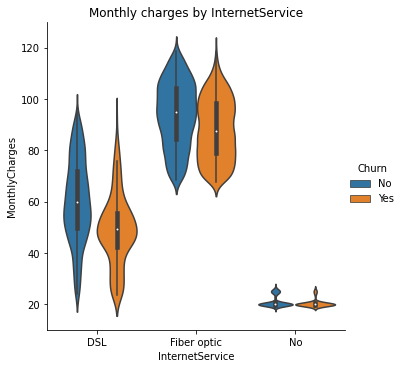

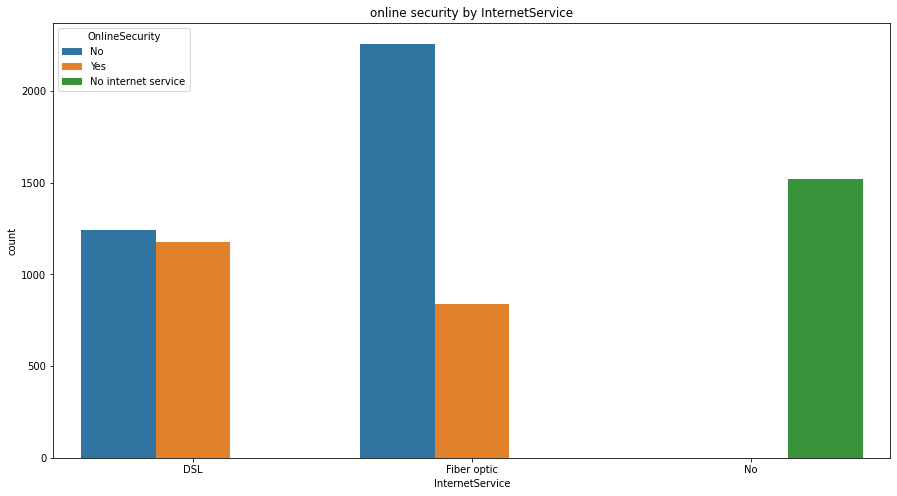

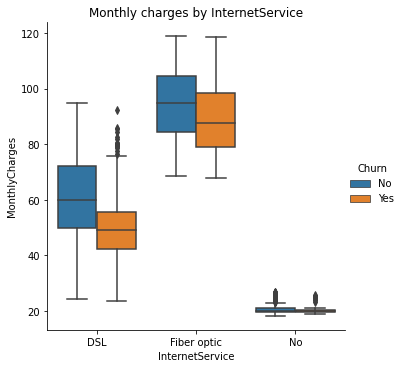

In [31]:
#InternetService composition of customers
fig1 = go.Figure(
    data=go.Pie(values=data['InternetService'].value_counts().values,labels=data['InternetService'].value_counts().index,title='InternetService composition of customers'))
fig1.show()


#InternetService count by churn

sns.countplot(data=data,x='InternetService' ,hue='Churn').set(title='Churn by InternetService')
rcParams['figure.figsize'] = 15,8




#monthly charges by InternetService
sns.catplot(data=data,x='InternetService',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by InternetService')
rcParams['figure.figsize'] = 15,8
plt.show()

#InternetService count by online security

sns.countplot(data=data,x='InternetService' ,hue='OnlineSecurity').set(title='online security by InternetService')
rcParams['figure.figsize'] = 15,8

#monthly charges by InternetService
sns.catplot(data=data,x='InternetService',y= 'MonthlyCharges', kind='box',hue='Churn').set(title='Monthly charges by InternetService')
rcParams['figure.figsize'] = 15,8
plt.show()

* Most customers are using fiber optic InternetService
* customers who use fiber optic InternetService are more likely to leave than those who DSL and does not use InternetService all
* Those using  fiber optic InternetService are with high monthly charges 
* Those using fiber optic InternetService are with a very poor online security

**1.7 What is the number of people churn by Contract type?**


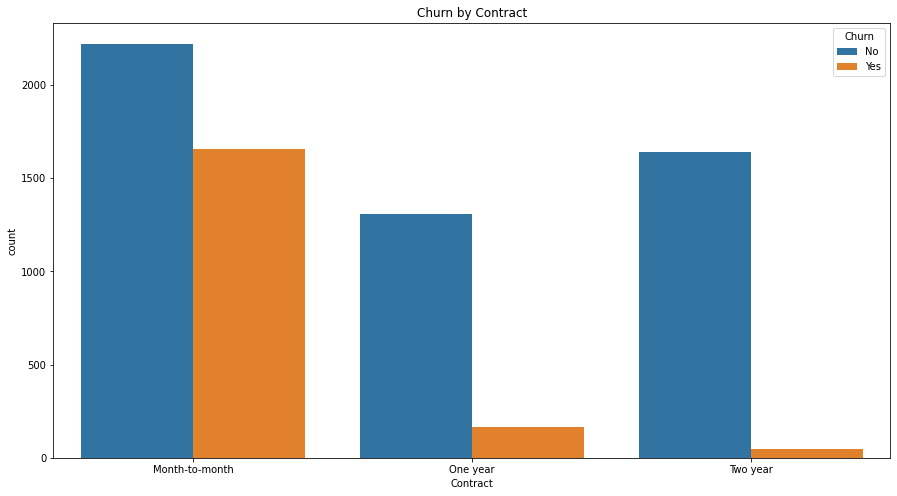

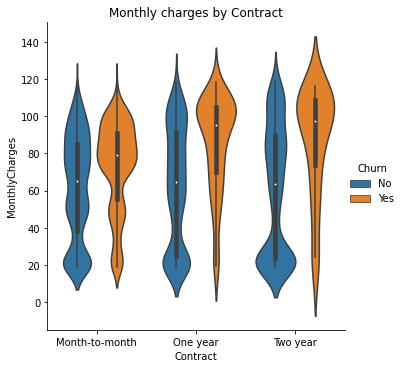

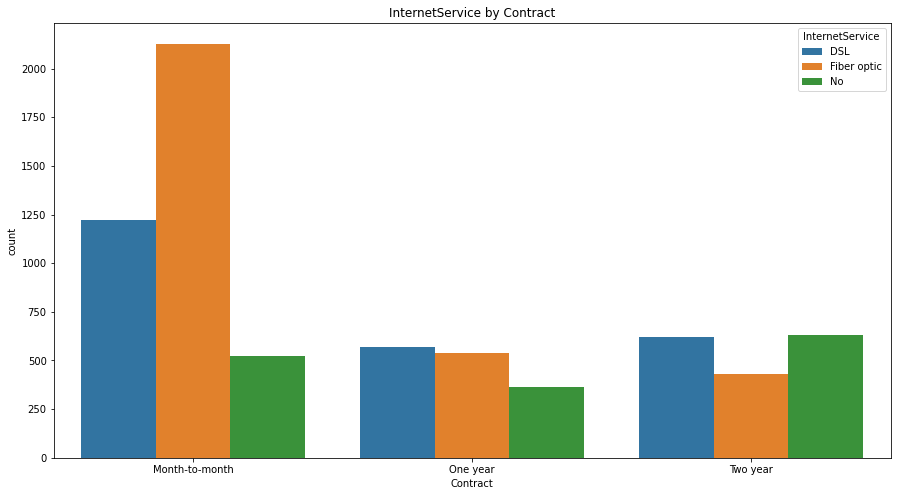

In [32]:
#Contract composition of customers
fig1 = go.Figure(
    data=go.Pie(values=data['Contract'].value_counts().values,labels=data['Contract'].value_counts().index,title='Contract composition of customers'))
fig1.show()


#Contract count by churn

sns.countplot(data=data,x='Contract',hue='Churn').set(title='Churn by Contract')
rcParams['figure.figsize'] = 15,8


#monthly charges by Contract
sns.catplot(data=data,x='Contract',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by Contract')
rcParams['figure.figsize'] = 15,8
plt.show()

#Contract count by InternetService

sns.countplot(data=data,x='Contract',hue='InternetService').set(title='InternetService by Contract')
rcParams['figure.figsize'] = 15,8

* According to the pie chart more than half of customers use a monthly payment option
* Customers churn far more frequently on monthly contracts.
* The churn rate is lower the longer the plan is.
* The longer the contract, the greater the monthly payments.
* Those with Month-to-Month contract use Fibre optics most

**1.8 What is the number of people churn by PaperlessBilling?**

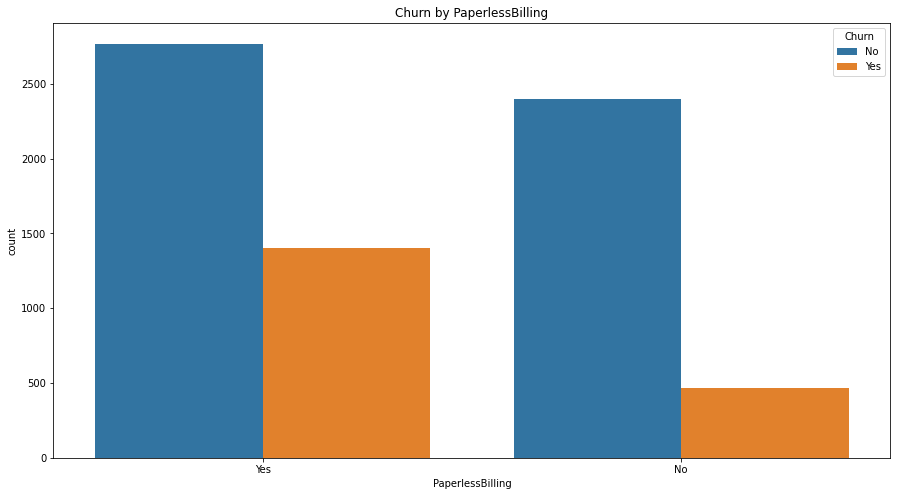

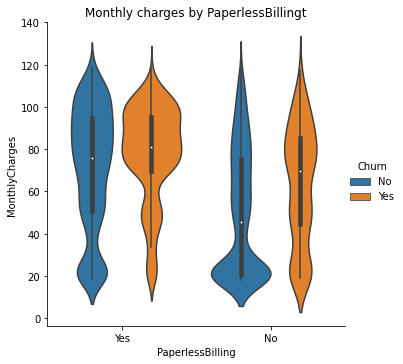

In [33]:
#PaperlessBilling composition of customers
fig1 = go.Figure(
    data=go.Pie(values=data['PaperlessBilling'].value_counts().values,labels=data['PaperlessBilling'].value_counts().index,title='PaperlessBilling composition'))
fig1.show()


#PaperlessBilling count by churn

sns.countplot(data=data,x='PaperlessBilling' ,hue='Churn').set(title='Churn by PaperlessBilling')
rcParams['figure.figsize'] = 15,8


#monthly charges by PaperlessBilling
sns.catplot(data=data,x='PaperlessBilling',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by PaperlessBillingt')
rcParams['figure.figsize'] = 15,8
plt.show()

* Non-paperless billing clients churn a little  higher than paperless billing subscribers.

In [34]:
#Copying df dataframe for visualization of services
copy = df.copy()
copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,grouped_tenure
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less_than_1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,less_than_3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less_than_1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,less_than_4
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less_than_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,less_than_2
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,greater_than_5
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,less_than_1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,less_than_1


# Visualization of other services

In [35]:

def plot_services(df):
    copy = df[df.InternetService != 'No']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(copy.OnlineSecurity.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(262)
    plt.pie(copy.OnlineBackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(263)
    plt.pie(copy.DeviceProtection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(264)
    plt.pie(copy.TechSupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(265)
    plt.pie(copy.StreamingTV.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(266)
    plt.pie(copy.StreamingMovies.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(267)
    copy1 = copy[copy.OnlineSecurity == 'Yes']
    plt.pie(copy1.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(268)
    copy2 = copy[copy.OnlineBackup == 'Yes']
    plt.pie(copy2.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(269)
    copy3 = copy[copy.DeviceProtection == 'Yes']
    plt.pie(copy3.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,10)
    copy4 = copy[copy.TechSupport == 'Yes']
    plt.pie(copy4.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,11)
    copy5 = copy[copy.StreamingTV == 'Yes']
    plt.pie(copy5.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,12)
    copy6 = copy[copy.StreamingMovies == 'Yes']
    plt.pie(copy6.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()

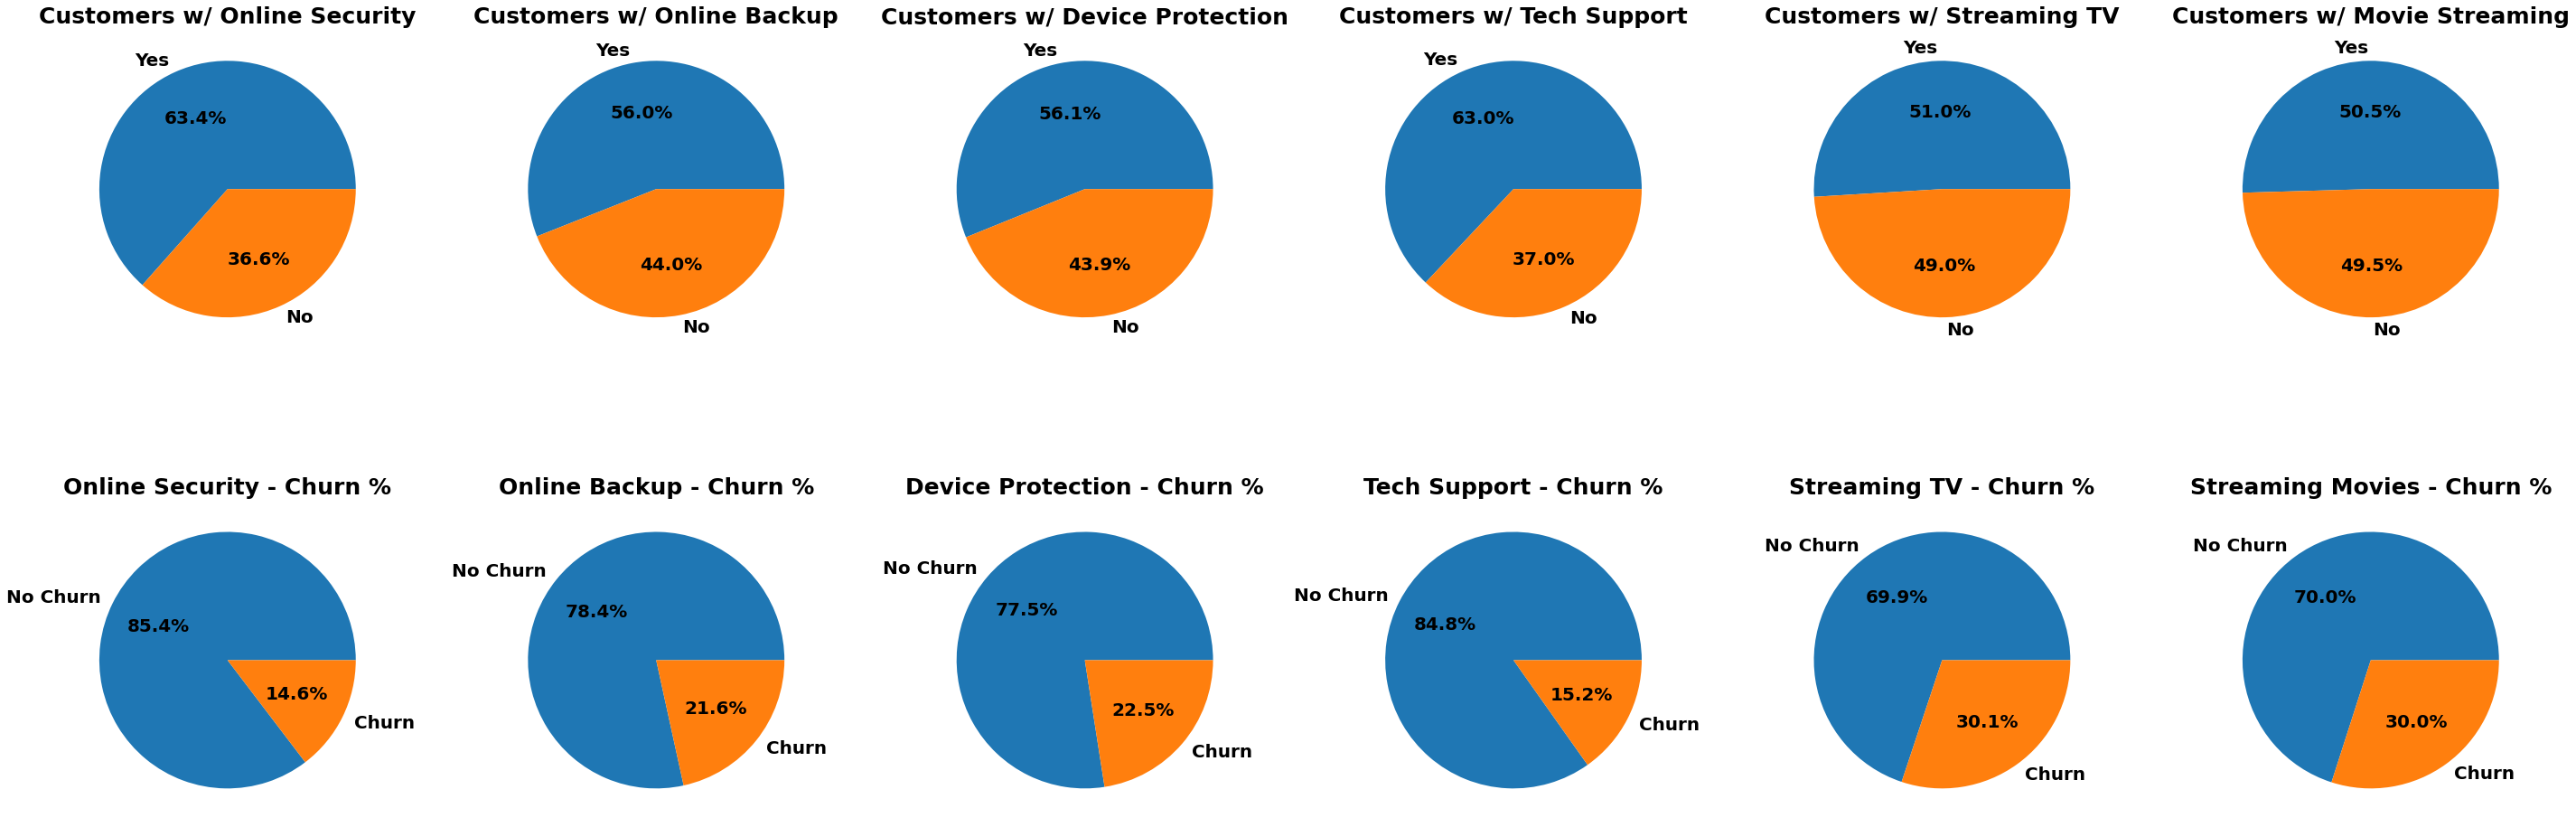

In [36]:
plot_services(df)

* Customers with TV Streaming and/or Movie streaming services churn more than all other services.

# Feature engineering

In [37]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Non-Senior,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Non-Senior,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,Non-Senior,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Non-Senior,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Non-Senior,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Non-Senior,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,Non-Senior,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,Non-Senior,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,SeniorCitizen,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [38]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [39]:
# Label Encoding target column
data.Churn.replace("No", 0, inplace = True)
data.Churn.replace("Yes", 1, inplace = True)

In [40]:
 target_col = data['Churn']
 train_df = data.drop(columns = ['Churn'])

In [41]:
# train_df.infer_objects().info()

In [42]:
useless_features = ["customerID", ]
useful_features = list(set(train_df) - set(useless_features))
print(f"[Info] '{len(useful_features)}' feature(s) to use for the next steps. ")

[Info] '19' feature(s) to use for the next steps. 


In [43]:
num_cols = data[useful_features].select_dtypes(include=np.number).columns.tolist()
cat_cols = data[useful_features].select_dtypes(exclude=np.number).columns.tolist()

print( f"Numeric features : {len(num_cols)}" )
print( f"Categorical features : {len(cat_cols)}" )

Numeric features : 3
Categorical features : 16


###Splitting Data into Predictor and Response Variable

In [44]:
 X = data[useful_features]
 y = data['Churn']

###Splitting Data into Train and Test data

In [45]:
  #Performing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52,stratify=y)
(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

(((4922, 19), (4922,)), ((2110, 19), (2110,)))

In [46]:
  X_train.head()#

,PaymentMethod,TechSupport,Dependents,MultipleLines,InternetService,DeviceProtection,OnlineSecurity,Partner,TotalCharges,SeniorCitizen,Contract,StreamingMovies,tenure,PaperlessBilling,OnlineBackup,MonthlyCharges,gender,StreamingTV,PhoneService
6499,Mailed check,No internet service,No,No,No,No internet service,No internet service,No,20.30,Non-Senior,Month-to-month,No internet service,1,No,No internet service,20.30,Male,No internet service,Yes
2503,Bank transfer (automatic),No internet service,Yes,No,No,No internet service,No internet service,Yes,926.00,Non-Senior,One year,No internet service,44,No,No internet service,20.60,Male,No internet service,Yes
5931,Electronic check,No,No,No,Fiber optic,Yes,No,Yes,1237.85,SeniorCitizen,Month-to-month,Yes,13,Yes,Yes,98.00,Male,Yes,Yes
70,Mailed check,Yes,No,No,DSL,No,No,No,49.05,Non-Senior,Month-to-month,No,1,No,No,49.05,Male,No,Yes
2973,Electronic check,No,Yes,No,Fiber optic,Yes,No,Yes,6283.30,Non-Senior,Month-to-month,Yes,62,Yes,Yes,100.15,Female,Yes,Yes


###Normalization and Encoding the dataset

In [47]:
# Pipeline for the Numeric features 
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", MinMaxScaler())]
)

# Pipeline for the Categorical features
encoder_categories = [ data[cat_cols[i] ].dropna().unique() for i in range(len(cat_cols)) ]

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", preprocessing.OneHotEncoder(categories=encoder_categories, drop="first", sparse=False)) #if_binary
           ])
# Associate the two pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, selector(dtype_include="number")),
        ("cat", cat_transformer, selector(dtype_exclude="number")),
        # ("num", num_transformer, num_cols),
        # ("cat", cat_transformer, cat_cols),
    ]
)
X_train_, X_test_ = preprocessor.fit_transform(X_train), preprocessor.transform(X_test)
        
# New categorical feature names
feature_names_out = preprocessor.named_transformers_['cat'][-1].get_feature_names_out().tolist()
indexes = [ int(feature_names_out[i][1:feature_names_out[i].find("_")]) for i in range(len(feature_names_out))]
cat_cols_encoded = [  col.replace( f"x{i}", cat_cols[i] )  for col,i in zip(feature_names_out, indexes)]
print( f"Categorical features after encoding : {len(cat_cols_encoded)}" )


# train df
df_X_train = pd.DataFrame(X_train_, columns=num_cols+cat_cols_encoded)

# test df
df_X_test = pd.DataFrame(X_test_, columns=num_cols+cat_cols_encoded)


Categorical features after encoding : 27


In [48]:
df_X_train.head()

,TotalCharges,tenure,MonthlyCharges,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),TechSupport_Yes,TechSupport_No internet service,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_Yes,DeviceProtection_No internet service,OnlineSecurity_Yes,OnlineSecurity_No internet service,Partner_No,SeniorCitizen_SeniorCitizen,Contract_One year,Contract_Two year,StreamingMovies_Yes,StreamingMovies_No internet service,PaperlessBilling_No,OnlineBackup_No,OnlineBackup_No internet service,gender_Male,StreamingTV_Yes,StreamingTV_No internet service,PhoneService_Yes
0,0.000173,0.000000,0.020398,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.104685,0.605634,0.023383,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,0.140670,0.169014,0.793532,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.003491,0.000000,0.306468,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.722883,0.859155,0.814925,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
df_X_test.head()

,TotalCharges,tenure,MonthlyCharges,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),TechSupport_Yes,TechSupport_No internet service,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_Yes,DeviceProtection_No internet service,OnlineSecurity_Yes,OnlineSecurity_No internet service,Partner_No,SeniorCitizen_SeniorCitizen,Contract_One year,Contract_Two year,StreamingMovies_Yes,StreamingMovies_No internet service,PaperlessBilling_No,OnlineBackup_No,OnlineBackup_No internet service,gender_Male,StreamingTV_Yes,StreamingTV_No internet service,PhoneService_Yes
0,0.333833,0.507042,0.606965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1,0.142084,0.859155,0.017413,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,0.148529,0.845070,0.022886,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.508845,0.915493,0.476119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.094773,0.281690,0.235323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Performing Smote Sampling 

In [50]:
 from imblearn.over_sampling import SMOTE
 sm = SMOTE(random_state=27, sampling_strategy=1.0)
 X_train_res,y_train_res = sm.fit_resample(df_X_train, y_train)

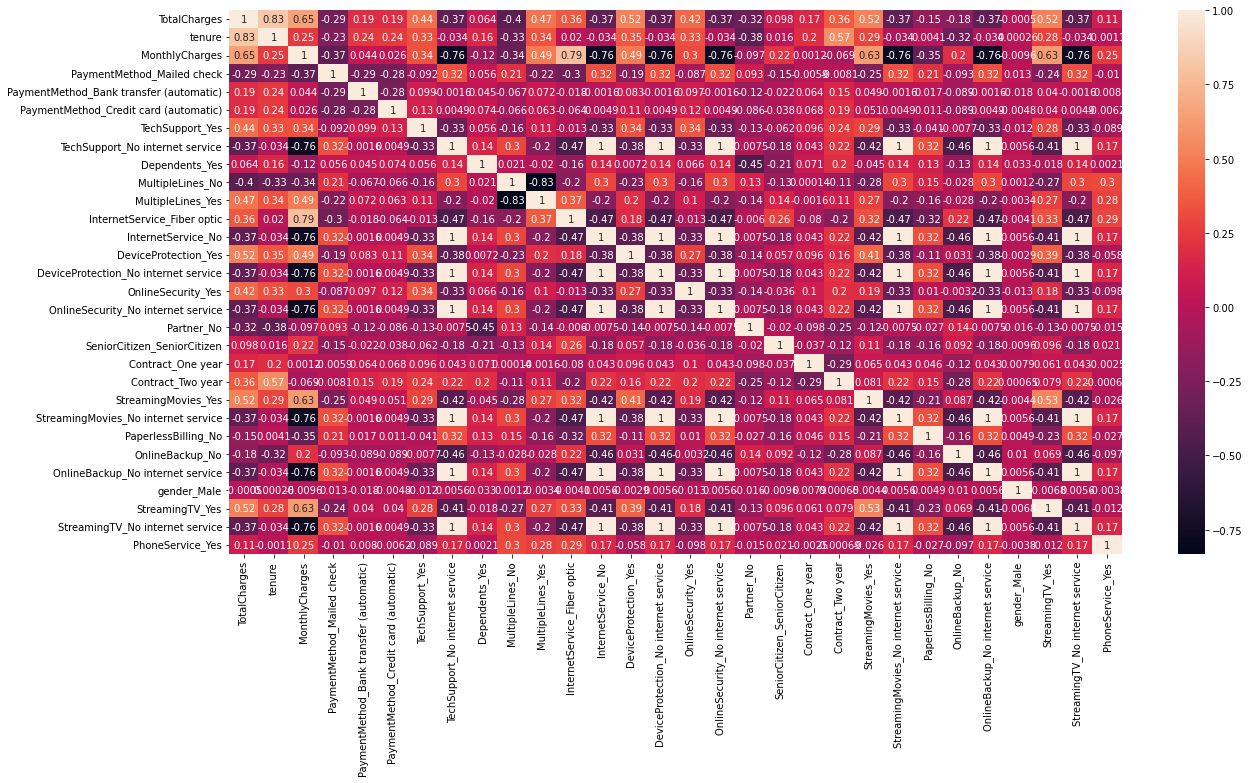

In [51]:
# Correlation
plt.figure(figsize = (20, 10))
sns.heatmap(df_X_train.corr(), annot = True);

# Model Building 

### 1. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(random_state = 24)
log_model=classifier1.fit(X_train_res, y_train_res)

In [53]:
#feature imporance of the logistic regression
reg_importance = log_model.coef_[0]
reg_importance = pd.DataFrame(reg_importance, index =df_X_train.columns)
reg_importance.reset_index(inplace = True)
reg_importance.rename(columns={'index':'Feature', 0 : 'Score'},inplace = True)
reg_importance.sort_values('Score',ascending= False, inplace=True)
reg_importance

#visualizing feature importance
figure= px.bar(reg_importance, x ='Feature', y= 'Score').update_xaxes(categoryorder='total descending')
figure.show()

In [54]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res, y_train_res)

#predicting test set result
y_pred = logreg.predict(df_X_test)

#evaluate results
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred,beta=2.0)

results = pd.DataFrame([['Logistics Regression',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Logistics Regression,0.769668,0.546239,0.789661,0.645773,0.725041


# Model Evaluation using Confusion Matrix

In [55]:
# import the metrics class
from sklearn import metrics

#defining confusion metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix =pd.DataFrame(cnf_matrix).reset_index(drop =True)
cnf_matrix

,0,1
0,1181,368
1,118,443


# Visualizing Confusion Matrix using Heatmap

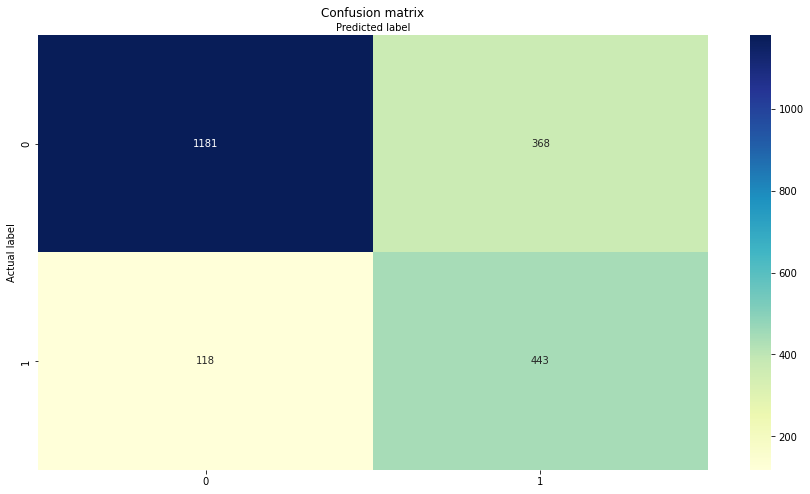

In [56]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 2. Support Vector Machine

In [57]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)

#predicting test set results
y_pred = clf.predict(df_X_test)

#evaluate results
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred,beta=2.0)

Model_results = pd.DataFrame([['SVM',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Logistics Regression,0.769668,0.546239,0.789661,0.645773,0.725041
1,SVM,0.778199,0.564854,0.721925,0.633803,0.683891


# Model Evaluation Model_results using Confusion Matrix

In [58]:
#defining confusion metrics
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2 =pd.DataFrame(cnf_matrix2).reset_index(drop =True)
cnf_matrix2

,0,1
0,1237,312
1,156,405


# Visualizing Confusion Matrix using Heatmap

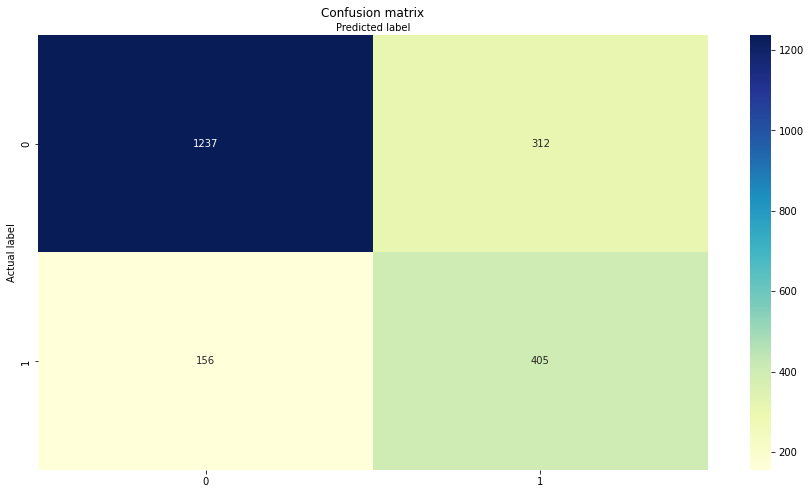

In [59]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix2, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 3. KNN

In [60]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Training the model using the training sets
knn.fit(X_train_res, y_train_res)

#Predicting the response for test dataset
y_pred = knn.predict(df_X_test)

#evaluate results
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred,beta=2.0)

Model_results = pd.DataFrame([['KNN',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Logistics Regression,0.769668,0.546239,0.789661,0.645773,0.725041
1,SVM,0.778199,0.564854,0.721925,0.633803,0.683891
2,KNN,0.715640,0.476647,0.709447,0.570201,0.646314


# Model Evaluation Model_results using Confusion Matrix

In [61]:
#defining confusion metrics
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix3 =pd.DataFrame(cnf_matrix3).reset_index(drop =True)
cnf_matrix3

,0,1
0,1112,437
1,163,398


# Visualizing Confusion Matrix using Heatmap

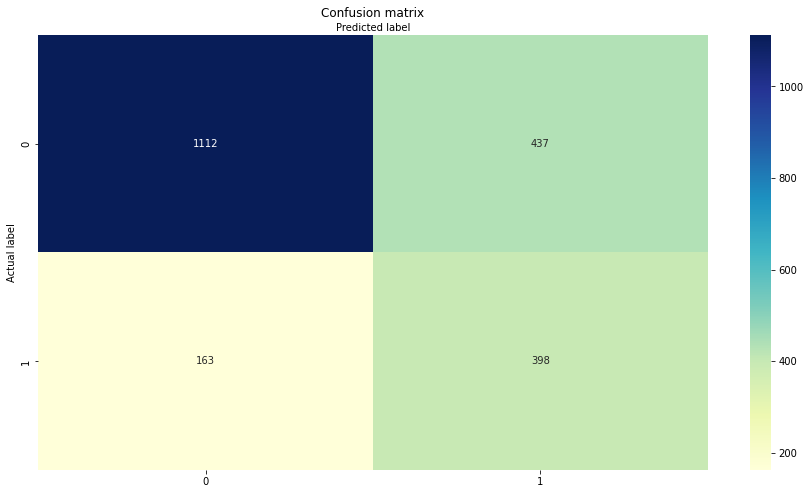

In [62]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix3, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

**Performance is poor so far, Let's train tree models on imbalance data**

# 4. Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer with train set
clf = clf.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred = clf.predict(df_X_test)

#evaluate results
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred,beta=2.0)

Model_results = pd.DataFrame([['Decision Tree',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Logistics Regression,0.769668,0.546239,0.789661,0.645773,0.725041
1,SVM,0.778199,0.564854,0.721925,0.633803,0.683891
2,KNN,0.715640,0.476647,0.709447,0.570201,0.646314
3,Decision Tree,0.714692,0.468315,0.540107,0.501656,0.524040


In [64]:
# Feature importances
dt_importance = clf.feature_importances_
dt_importance = pd.DataFrame(dt_importance, columns=["score"]).reset_index()
dt_importance["Feature"] = list(df_X_train.columns)
dt_importance.drop(columns=["index"], inplace=True)

dt_importance.sort_values(by="score",
                          ascending=False,
                          ignore_index=True,
                          inplace=True)

# Plotting the feature importances
fig = px.bar(dt_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [65]:
#defining confusion metrics
cnf_matrix4 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix4 =pd.DataFrame(cnf_matrix4).reset_index(drop =True)
cnf_matrix4

,0,1
0,1205,344
1,258,303


# Visualizing Confusion Matrix using Heatmap

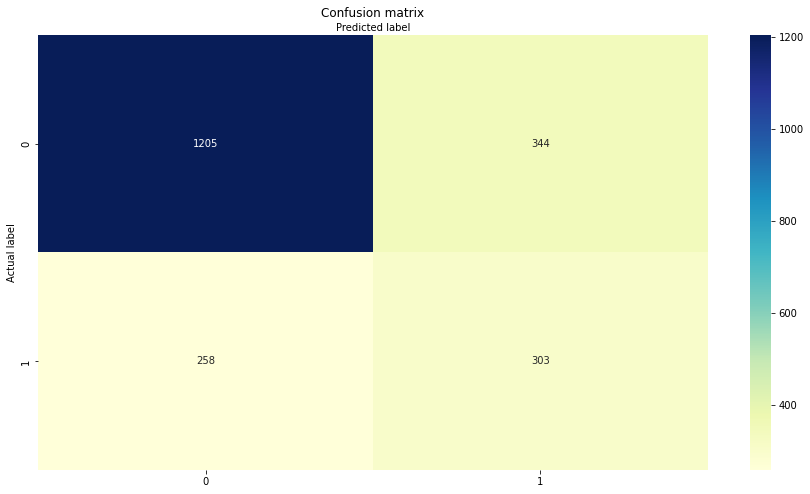

In [66]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix4, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# Visualizing the Decision Tree

**we will use graphviz to visualize**

In [67]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree



import graphviz
features =['Tenure','MonthlyCharges','TotalCharges','Gender','Dependents','PhoneService','SeniorCitizen','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                         
                               
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Output hidden; open in https://colab.research.google.com to view.

Notes

**Gini**

Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.

0 denotes that all elements belong to a certain class or if there exists only one class, and

1 denotes that the elements are randomly distributed across various classes.

A Gini Index of 0.5 denotes equally distributed elements into some classes.

**Samples**

It refers to what is left at a particular point in decision 

**Value**
Let's say value = [6 , 7], it means 6 will get a "NO", and 7 will get a "YES" (Churn).

# 5. Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

#creating xbb  classifier
gb_clf2 = GradientBoostingClassifier(n_estimators=500, max_depth=5, random_state=42)

#Training the model using the training sets
gb_clf2.fit(X_train_res, y_train_res)

#Predicting the response for test dataset
y_pred = gb_clf2.predict(df_X_test)

#evaluate results
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred,beta=2.0)

Model_results = pd.DataFrame([['Gradient Boosting',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Logistics Regression,0.769668,0.546239,0.789661,0.645773,0.725041
1,SVM,0.778199,0.564854,0.721925,0.633803,0.683891
2,KNN,0.715640,0.476647,0.709447,0.570201,0.646314
3,Decision Tree,0.714692,0.468315,0.540107,0.501656,0.524040
4,Gradient Boosting,0.790995,0.614068,0.575758,0.594296,0.583032


In [69]:
# Feature Importance of the Model
sm_xgb_importance = gb_clf2.feature_importances_
sm_xgb_importance = pd.DataFrame(sm_xgb_importance,
                                 columns=["score"]).reset_index()
sm_xgb_importance["Feature"] = list(df_X_train.columns)
sm_xgb_importance.drop(columns=["index"], inplace=True)
sm_xgb_importance.sort_values(by="score",
                              ascending=False,
                              ignore_index=True,
                              inplace=True)

fig = px.bar(sm_xgb_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [70]:
#defining confusion metrics
cnf_matrix5 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix5 =pd.DataFrame(cnf_matrix5).reset_index(drop =True)
cnf_matrix5

,0,1
0,1346,203
1,238,323


# Visualizing Confusion Matrix using Heatmap

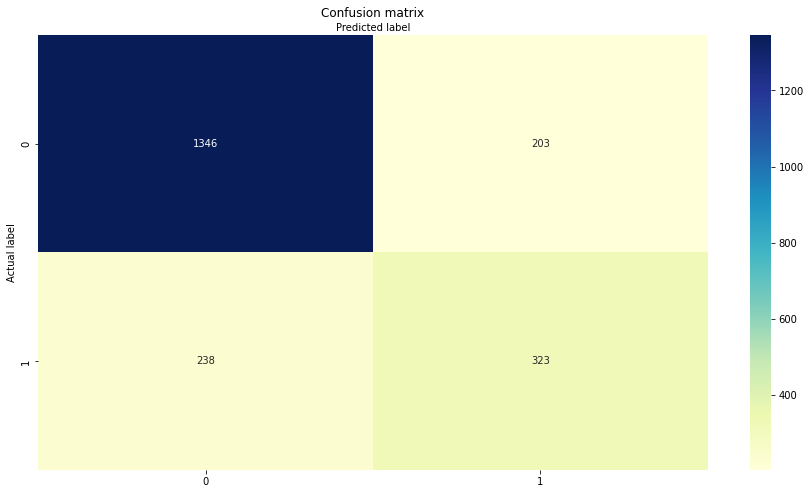

In [71]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix5, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 6. Random Forest

In [72]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a  Classifier
clf1=RandomForestClassifier()

#Train the model using the training sets
model_train=clf1.fit(X_train_res, y_train_res)

#Predicting the response for test dataset
y_pred = clf1.predict(df_X_test)

#evaluate results
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred,beta=2.0)

Model_results = pd.DataFrame([['Random Forest',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Logistics Regression,0.769668,0.546239,0.789661,0.645773,0.725041
1,SVM,0.778199,0.564854,0.721925,0.633803,0.683891
2,KNN,0.715640,0.476647,0.709447,0.570201,0.646314
3,Decision Tree,0.714692,0.468315,0.540107,0.501656,0.524040
4,Gradient Boosting,0.790995,0.614068,0.575758,0.594296,0.583032
5,Random Forest,0.777725,0.584871,0.565062,0.574796,0.568916


In [73]:
!pip install nbformat>=4.2.0

In [74]:
# Feature Importance of the Model
sm_rf_importance = clf1.feature_importances_
sm_rf_importance = pd.DataFrame(sm_rf_importance,
                                columns=["score"]).reset_index()
sm_rf_importance["Feature"] = list(df_X_train.columns)
sm_rf_importance.drop(columns=["index"], inplace=True)
sm_rf_importance.sort_values(by="score",
                             ascending=False,
                             ignore_index=True,
                             inplace=True)

fig = px.bar(sm_rf_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [75]:
#defining confusion metrics
cnf_matrix6 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix6 =pd.DataFrame(cnf_matrix6).reset_index(drop =True)
cnf_matrix6

,0,1
0,1324,225
1,244,317


# Visualizing Confusion Matrix using Heatmap

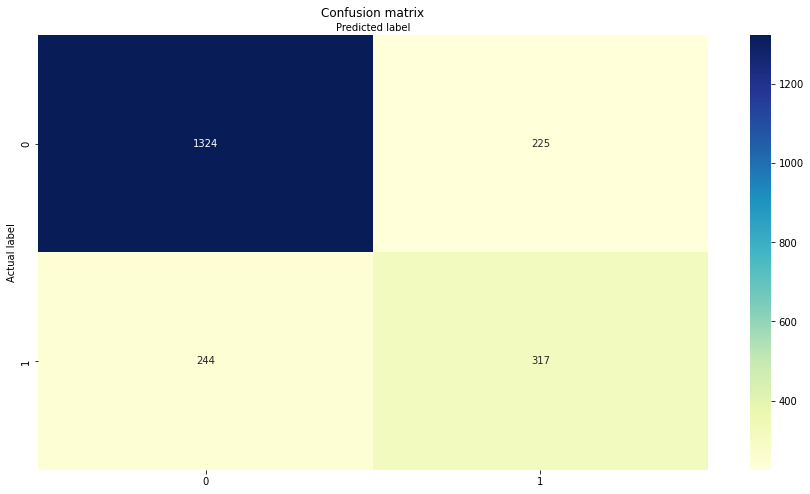

In [76]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix6, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 7. ADABOOST

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# initializing the adaBoost classifier or creating a classifier
ada = AdaBoostClassifier(random_state = 24)
# Train Adaboost Classifer
model = ada.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred = model.predict(df_X_test)

#evaluate results
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred,beta=2.0)

Model_results = pd.DataFrame([['AdaBoost',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Logistics Regression,0.769668,0.546239,0.789661,0.645773,0.725041
1,SVM,0.778199,0.564854,0.721925,0.633803,0.683891
2,KNN,0.715640,0.476647,0.709447,0.570201,0.646314
3,Decision Tree,0.714692,0.468315,0.540107,0.501656,0.524040
4,Gradient Boosting,0.790995,0.614068,0.575758,0.594296,0.583032
5,Random Forest,0.777725,0.584871,0.565062,0.574796,0.568916
6,AdaBoost,0.778673,0.561358,0.766488,0.648078,0.714286


In [78]:
# Feature Importance of the Model
sm_ada_importance = ada.feature_importances_
sm_ada_importance = pd.DataFrame(sm_rf_importance,
                                columns=["score"]).reset_index()
sm_ada_importance["Feature"] = list(df_X_train.columns)
sm_ada_importance.drop(columns=["index"], inplace=True)
sm_ada_importance.sort_values(by="score",
                             ascending=False,
                             ignore_index=True,
                             inplace=True)

fig = px.bar(sm_ada_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [79]:
#defining confusion metrics
cnf_matrix7 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix7 =pd.DataFrame(cnf_matrix7).reset_index(drop =True)
cnf_matrix7

,0,1
0,1213,336
1,131,430


# Visualizing Confusion Matrix using Heatmap

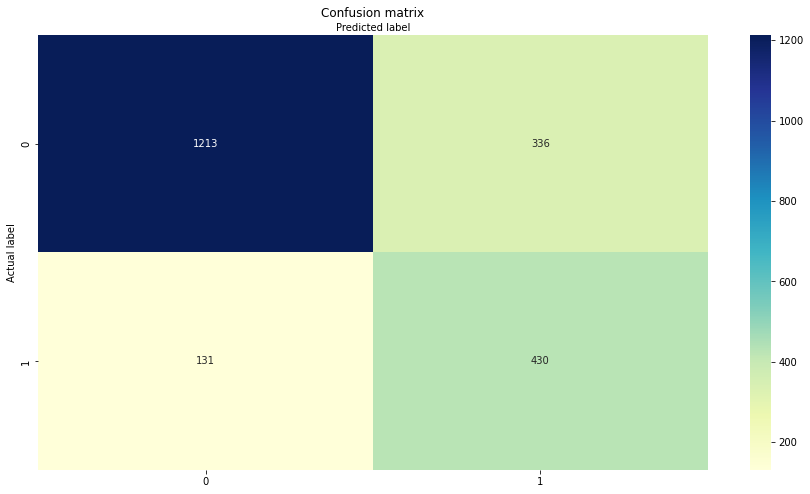

In [80]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix7, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 8. CATBOOST

In [81]:
# importing the CatBoot classifier
from catboost import CatBoostClassifier
from catboost import Pool


# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()

# training the catboost classifier model
CatBoost_clf.fit(X_train_res, y_train_res)

# making predictions
catboost_pred = CatBoost_clf.predict(df_X_test)

#evaluate results
acc = accuracy_score(y_test,catboost_pred )
prec = precision_score(y_test,catboost_pred )
rec = recall_score(y_test, catboost_pred )
f1 = f1_score(y_test,catboost_pred )
f2 = fbeta_score(y_test,catboost_pred ,beta=2.0)



Learning rate set to 0.023974
0:	learn: 0.6807340	total: 55.6ms	remaining: 55.5s
1:	learn: 0.6677866	total: 61.8ms	remaining: 30.8s
2:	learn: 0.6559156	total: 68.2ms	remaining: 22.7s
3:	learn: 0.6450510	total: 74.5ms	remaining: 18.6s
4:	learn: 0.6348342	total: 81ms	remaining: 16.1s
5:	learn: 0.6253626	total: 87.4ms	remaining: 14.5s
6:	learn: 0.6170685	total: 93.8ms	remaining: 13.3s
7:	learn: 0.6080098	total: 101ms	remaining: 12.5s
8:	learn: 0.6004718	total: 107ms	remaining: 11.8s
9:	learn: 0.5917305	total: 113ms	remaining: 11.2s
10:	learn: 0.5836153	total: 120ms	remaining: 10.7s
11:	learn: 0.5769329	total: 126ms	remaining: 10.4s
12:	learn: 0.5710221	total: 133ms	remaining: 10.1s
13:	learn: 0.5645591	total: 140ms	remaining: 9.83s
14:	learn: 0.5589276	total: 146ms	remaining: 9.61s
15:	learn: 0.5531023	total: 153ms	remaining: 9.42s
16:	learn: 0.5470232	total: 160ms	remaining: 9.23s
17:	learn: 0.5421960	total: 172ms	remaining: 9.41s
18:	learn: 0.5372814	total: 179ms	remaining: 9.23s
19:	le

In [82]:
Model_results = pd.DataFrame([['CatBoost',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score,F2 score
0,Logistics Regression,0.769668,0.546239,0.789661,0.645773,0.725041
1,SVM,0.778199,0.564854,0.721925,0.633803,0.683891
2,KNN,0.715640,0.476647,0.709447,0.570201,0.646314
3,Decision Tree,0.714692,0.468315,0.540107,0.501656,0.524040
4,Gradient Boosting,0.790995,0.614068,0.575758,0.594296,0.583032
5,Random Forest,0.777725,0.584871,0.565062,0.574796,0.568916
6,AdaBoost,0.778673,0.561358,0.766488,0.648078,0.714286
7,CatBoost,0.789100,0.605455,0.593583,0.599460,0.595920


In [83]:
# Feature Importance of the Model
sm_catb_importance = CatBoost_clf.feature_importances_
sm_catb_importance = pd.DataFrame(sm_catb_importance,
                                  columns=["score"]).reset_index()

sm_catb_importance["Feature"] = list(df_X_train.columns)

sm_catb_importance.drop(columns=["index"], inplace=True)

sm_catb_importance.sort_values(by="score",
                               ascending=False,
                               ignore_index=True,
                               inplace=True)

fig = px.bar(sm_catb_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [84]:
#defining confusion metrics
cnf_matrix8 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix8 =pd.DataFrame(cnf_matrix8).reset_index(drop =True)
cnf_matrix8

,0,1
0,1213,336
1,131,430


# Visualizing Confusion Matrix using Heatmap

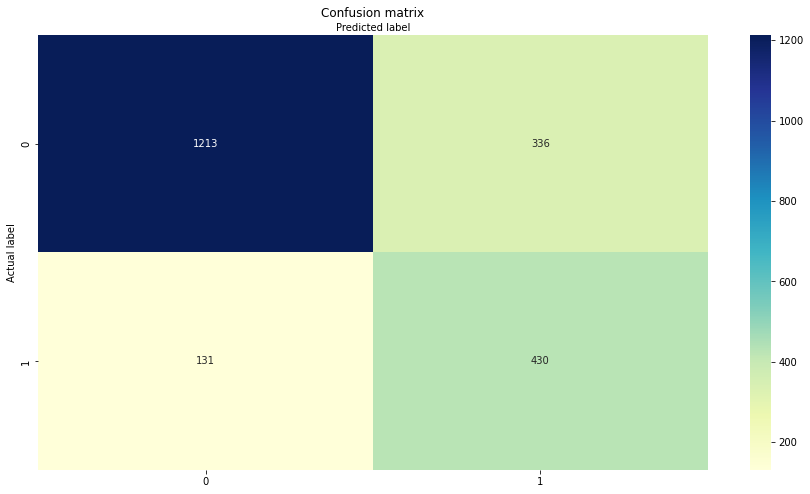

In [85]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix8, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top") 

# VISUALIZING CATBOOST

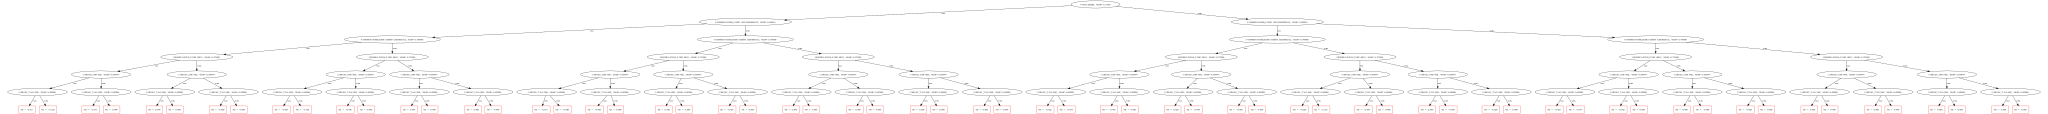

In [86]:
cat_features = list(X_train_res.columns)
pool = Pool(X_train_res, y_train_res, feature_names=cat_features)
model = CatBoostClassifier(verbose=0, one_hot_max_size=8).fit(pool)

model.plot_tree(tree_idx=1,pool=pool)

# Model selection and Model Optimization

**From above models , we noted that the AdaBoostClassifier has the highest F2 and F1 scores,  ranking highest across all the 7 models**

# Cross-Validation and Hyperparameter tuning

**K-Fold Cross-Validation**

In [87]:
# Defining the number of folds for cross-validation and the range of estimators
from sklearn.feature_selection import SelectKBest, chi2 # Univariate Selection using KBest
from sklearn.model_selection import *  #cross_val_score, fbeta_score, KFold, make_scorer, train_test_split, RandomizedSearchCV
cv = list(range(10, 21, 5))

# Using a loop to cross-validate with each number in the range of estimators
for c in cv:
    score = cross_val_score(estimator = model_train, X = X_train_res, y = y_train_res, cv=c).mean()
    
    print(f"The average score after cross-validation for the model at {c} folds is:", "{0:.5}".format(score))

The average score after cross-validation for the model at 10 folds is: 0.85489
The average score after cross-validation for the model at 15 folds is: 0.85475
The average score after cross-validation for the model at 20 folds is: 0.85191


According to the results, the best performance on each iteration is at 100 estimators, with the mean score on cross-validation increasing with the number of estimators.


We may use these findings to inform additional tweaking and model optimization because it is the sole hyperparameter we tuned here.

**RandomizedSearch Cross-Validation**

In [88]:
# Defining the values and instantiating the grid to be used in the RandomizedSearch
n_estimators = list(range(10, 1001, 50))
grid = {
    "n_estimators": n_estimators,
    "max_depth": [1, 5, 10, 20, 50, 75, 100, 150, 200, 300],
    "learning_rate" :[0.01,0.1,1,10,100],
    "random_state": [24]
}

In [89]:
# Running the RandomizedSearch Cross-Validation with the above set of Parameters45r4
cv_model = RandomizedSearchCV(estimator= model,
                                     param_distributions= grid,
                                     n_iter= 30,
                                     cv= 10,
                                     random_state= 24,
                                     n_jobs= -1)

# Fitting the model to the training data
cv_model.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=10,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f969d857760>,
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200, 300],
                                        'n_estimators': [10, 60, 110, 160, 210,
                                                         260, 310, 360, 410,
                                                         460, 510, 560, 610,
                                                         660, 710, 760, 810,
                                                         860, 910, 960],
                                        'random_state': [24]},
                   random_state=24)

In [90]:
# Looking at the best combination of hyperparameters for the model
best_params =cv_model.best_params_
print("The best combination of hyperparameters for the model will be:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name} : {best_params[param_name]}")

The best combination of hyperparameters for the model will be:
learning_rate : 0.01
max_depth : 5
n_estimators : 860
random_state : 24


In [91]:
# Looking at the best score for the model during cross-validation
print("The mean cross-validated score of the model's best combination of hyperparameters is:",
      "{0:.5}".format(cv_model.best_score_))

The mean cross-validated score of the model's best combination of hyperparameters is: 0.84133


We observe a considerable increase in the model's score using the RandomizedSearchCV. As a result, using the suggested parameters listed above, we will construct a "optimal" version of the model and evaluate it

In [92]:
# Defining an optimized version of the model with the best parameters
best_cv_model = AdaBoostClassifier(
                                            learning_rate= 0.01,
                                            #max_depth= 5,
                                            n_estimators= 860,
                                            random_state= 24
                                           )

In [93]:
# Fitting the model to the training data
best_cv_model= best_cv_model.fit(X_train_res, y_train_res)

# Predicting the test data
best_rf_pred = best_cv_model.predict(df_X_test)

In [94]:
from sklearn import metrics
from sklearn.metrics import *
#Evaluating the model
best_rf_report = classification_report(y_test, best_rf_pred, target_names= ["Stayed", "Churned"])
print(best_rf_report)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, best_rf_pred)
accuracy = "{:.5f}".format(accuracy)
print("Accuracy:", accuracy)

# Calculating the F2 Score
f2_score = fbeta_score(y_test, best_rf_pred, beta=0.5)
f2_score = "{:.5f}".format(f2_score)
print("F2 Score:", f2_score)

              precision    recall  f1-score   support

      Stayed       0.91      0.75      0.82      1549
     Churned       0.53      0.79      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.76      0.77      2110

Accuracy: 0.75972
F2 Score: 0.56933


In [95]:
#defining confusion metrics
cnf_matrix9 = metrics.confusion_matrix(y_test, best_rf_pred)
cnf_matrix9 =pd.DataFrame(cnf_matrix9).reset_index(drop =True)
cnf_matrix9

,0,1
0,1162,387
1,120,441


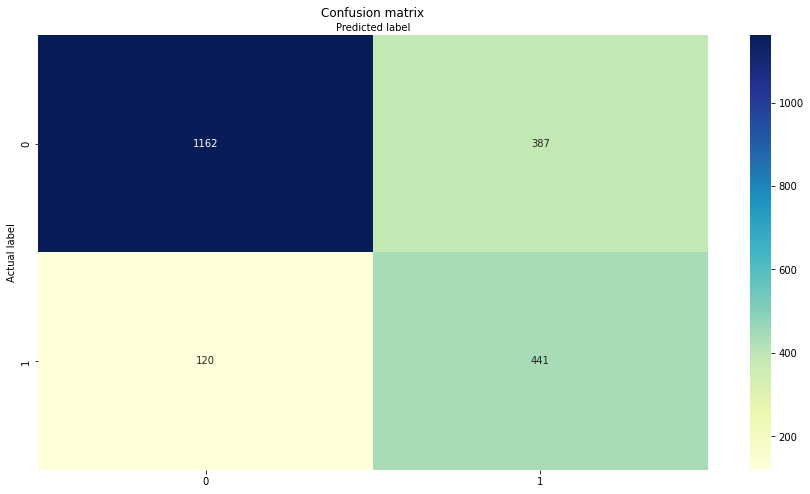

In [96]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix9, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

**So far this is our best model, therefore we will go ahead and make our future predictions**

# Future Prediction

In [97]:
# Initializing the model (just showing it)
best_cv_model

AdaBoostClassifier(learning_rate=0.01, n_estimators=860, random_state=24)

In [98]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("estimator", best_cv_model)]
)

In [99]:
pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f969d9f94f0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(categori...
                

In [100]:
pipe.predict(X_train)

array([0, 0, 1, ..., 1, 0, 0])

In [101]:
# Predicting again the test data
best_rf_pred = best_cv_model.predict(df_X_test)

# Evaluating the model
best_rf_report = classification_report(y_test, best_rf_pred, target_names=["Stayed", "Churned"])
print(best_rf_report)

# Calculating the F2 Score
f2_score = fbeta_score(y_test, best_rf_pred, beta= 0.5)
f2_score = "{:.5f}".format(f2_score)
print("F2 Score:", f2_score)

              precision    recall  f1-score   support

      Stayed       0.82      0.95      0.88      1549
     Churned       0.74      0.41      0.53       561

    accuracy                           0.80      2110
   macro avg       0.78      0.68      0.70      2110
weighted avg       0.80      0.80      0.78      2110

F2 Score: 0.63701


In [102]:
#defining confusion metrics
cnf_matrix10 = metrics.confusion_matrix(y_test, best_rf_pred)
cnf_matrix10 =pd.DataFrame(cnf_matrix10).reset_index(drop =True)
cnf_matrix10

,0,1
0,1466,83
1,329,232


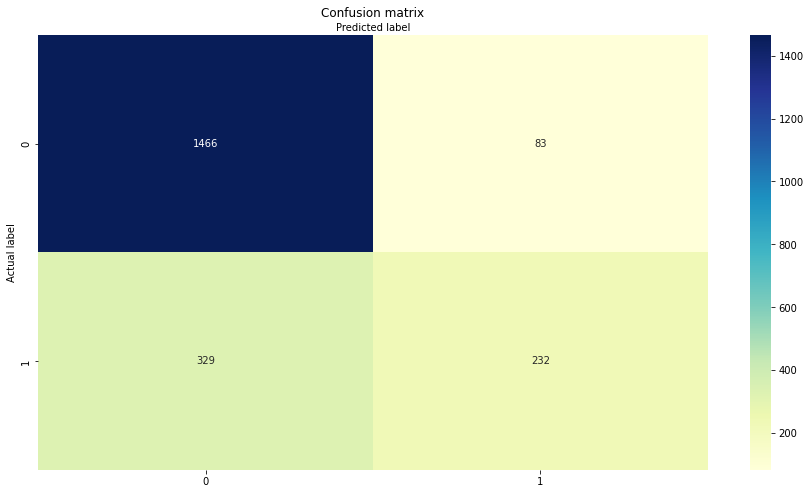

In [103]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix10, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

From the performance of the model on the test data , we note that the AdaBoostClassifier performed  better on the test data . It is therefore recommended for further development and application.

# Loading requirements for app development 

In [104]:
requirements = '\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None))

with open('requirements.txt', 'w') as f:
    f.write(requirements)

In [105]:
# Objects tto export
to_export = {
    "pipeline": pipe,
    'numeric_columns': num_cols,
    'categorical_columns': cat_cols,
    'encoder_categories': encoder_categories}

In [106]:
# Exportation
with open('ML_items', 'wb') as file:
    pickle.dump(to_export, file)

In [107]:
# Loading after Exportation
with open('ML_items', 'rb') as file:
    loaded_object = pickle.load(file)

In [108]:
loaded_object

{'pipeline': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    MinMaxScaler())]),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f969d901e50>),
                                                  ('cat',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('encoder',
                                                                    OneHotEncoder(cate